In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df_locations = pd.read_csv('https://www.dropbox.com/s/abtl5gju0i88ik8/Locations.csv?raw=1')
df_tanks = pd.read_csv('https://www.dropbox.com/s/0kthpvf5d08nozj/Tanks.csv?raw=1')
df_invoices = pd.read_csv('https://www.dropbox.com/s/3vll0ktznaqfa05/Invoices.csv?raw=1')
df_fuel_level_1 = pd.read_csv('https://www.dropbox.com/s/ekhha7xfiayrwvq/Fuel_Level_Part_1.csv?raw=1')
df_fuel_level_2 = pd.read_csv('https://www.dropbox.com/s/lx8g7a8nfvha2jm/Fuel_Level_Part_2.csv?raw=1')

In [3]:
# get the summary of data type and length
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gas Station Location   8 non-null      int64  
 1   Gas Station Name       8 non-null      object 
 2   Gas Station Address    8 non-null      object 
 3   Gas Station Latitude   8 non-null      float64
 4   Gas Station Longitude  8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 448.0+ bytes


In [4]:
# get the summary of data type and length
df_tanks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tank ID        23 non-null     object
 1   Tank Location  23 non-null     int64 
 2   Tank Number    23 non-null     int64 
 3   Tank Type      23 non-null     object
 4   Tank Capacity  23 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Invoice Date                  2831 non-null   object 
 1   Invoice ID                    2831 non-null   float64
 2   Invoice Gas Station Location  2831 non-null   int64  
 3   Gross Purchase Cost           2831 non-null   float64
 4   Amount Purchased              2831 non-null   float64
 5   Fuel Type                     2831 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 154.8+ KB


<AxesSubplot:>

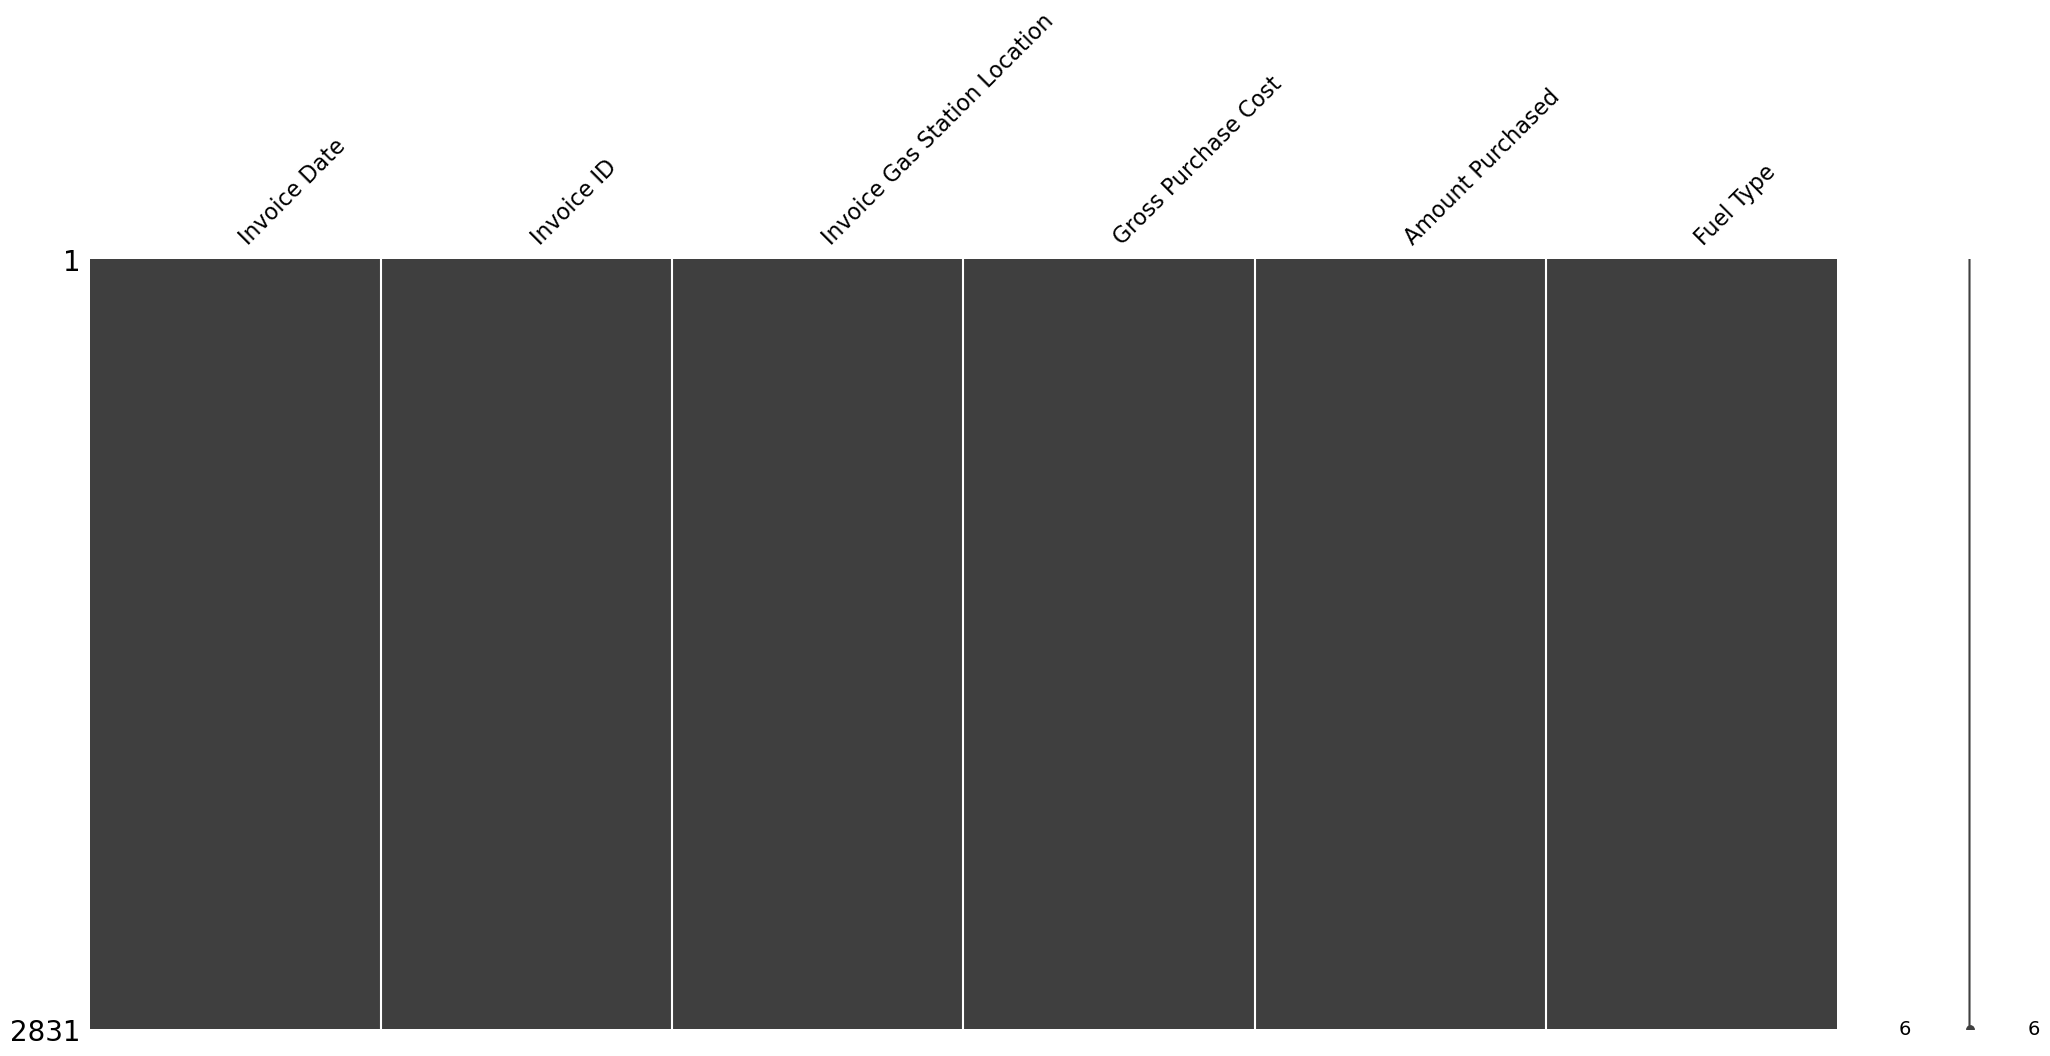

In [8]:
# # get the summary of data type and length, find missing values in invoice data
df_invoices.info()
msno.matrix(df_invoices)

In [9]:
# the matrix shows that some key values are missing in the same rows, so just drop these rows
df_invoices.dropna(inplace=True)
df_invoices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Invoice Date                  2831 non-null   object 
 1   Invoice ID                    2831 non-null   float64
 2   Invoice Gas Station Location  2831 non-null   int64  
 3   Gross Purchase Cost           2831 non-null   float64
 4   Amount Purchased              2831 non-null   float64
 5   Fuel Type                     2831 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 154.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885151 entries, 0 to 885150
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Tank ID     885151 non-null  object 
 1   Fuel Level  885149 non-null  float64
 2   Time stamp  885151 non-null  object 
dtypes: float64(1), object(2)
memory usage: 20.3+ MB


,Tank ID,Fuel Level,Time stamp
3,T12,NaN,1/1/2017 0:45
111,T12,NaN,1/2/2017 3:35


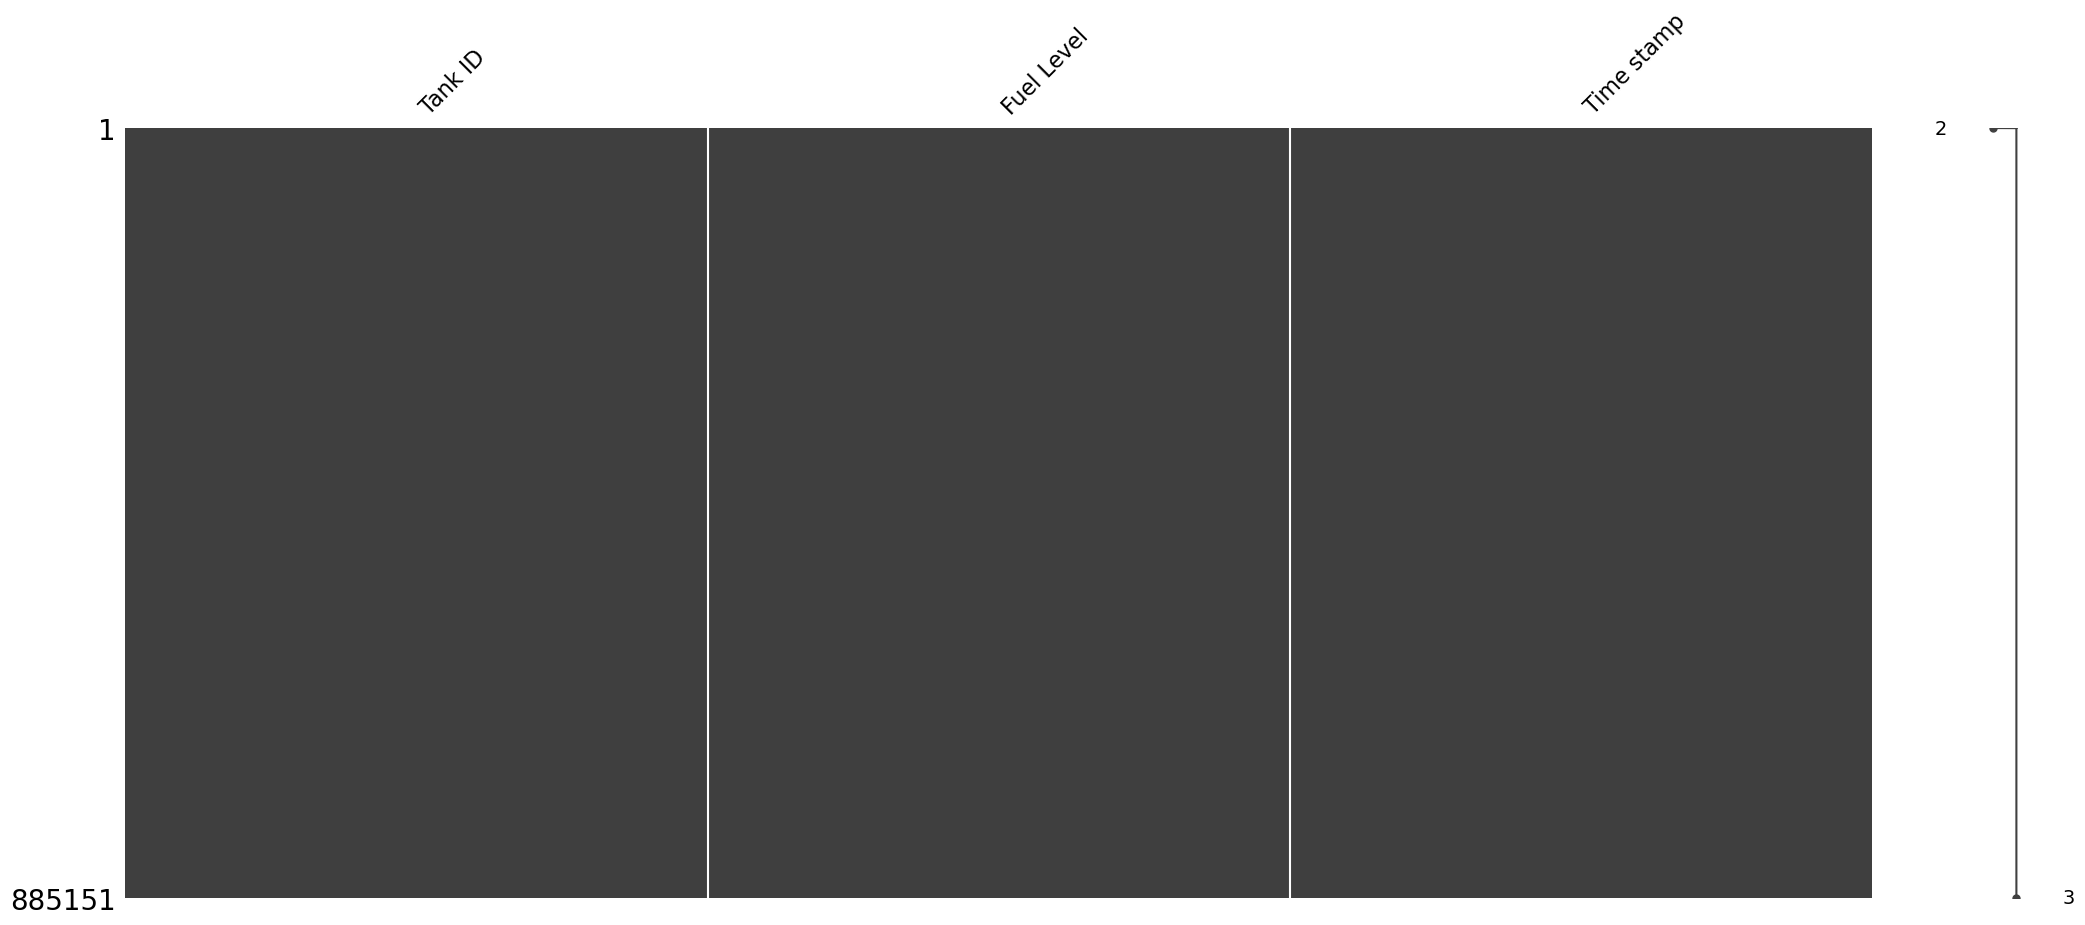

In [10]:
# check if there is missing value
df_fuel_level_1.info()
msno.matrix(df_fuel_level_1)
# fuel levels are missing in 2 rows, and the format of Tank ID is not consistent in these two rows
df_fuel_level_1[df_fuel_level_1['Fuel Level'].isna()]

In [11]:
#clean data for df_fuel_level_1
df_fuel_level_1.head()
# expect a linear fuel level, so using interpolate
df_fuel_level_1.interpolate(inplace = True)
# matching format
df_fuel_level_1.replace('T12', 'T 12', inplace = True)

In [12]:
df_fuel_level_2.info()
# matching column name format for the two part of fuel level data
df_fuel_level_1.rename(columns={'Fuel Level': 'Fuel_Level','Time stamp':'Timestamp'},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974509 entries, 0 to 974508
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Tank ID     974509 non-null  object
 1   Fuel_Level  974509 non-null  int64 
 2   Timestamp   974509 non-null  object
dtypes: int64(1), object(2)
memory usage: 22.3+ MB


In [13]:
# since the two dataframes have same info, just using concat for merging these two tables
df_fuel_level = pd.concat([df_fuel_level_1, df_fuel_level_2]).drop_duplicates().reset_index(drop = True)
df_fuel_level

,Tank ID,Fuel_Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T 12,26860.0,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
1859584,T 32,27619.0,8/15/2019 23:53
1859585,T 22,31548.0,8/15/2019 23:57
1859586,T 16,53492.0,8/15/2019 23:57
1859587,T 18,27081.0,8/15/2019 23:57


In [63]:
# making the timestamp to date time. It took me slightly long time to run this code, I don't know why
df_tank_fuel = df_tanks.merge(df_fuel_level, on='Tank ID', how='left', indicator = True, validate = '1:m')
df_tank_fuel['Timestamp'] = pd.to_datetime(df_tank_fuel['Timestamp'])

In [64]:
# checking if all necessary data processing are done for this dataframe
df_tank_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859589 entries, 0 to 1859588
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Tank ID        object        
 1   Tank Location  int64         
 2   Tank Number    int64         
 3   Tank Type      object        
 4   Tank Capacity  int64         
 5   Fuel_Level     float64       
 6   Timestamp      datetime64[ns]
 7   _merge         category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 115.3+ MB


In [67]:
# check data
df_invoices.info()
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Invoice Date          2831 non-null   object 
 1   Invoice ID            2831 non-null   float64
 2   Gas Station Location  2831 non-null   int64  
 3   Gross Purchase Cost   2831 non-null   float64
 4   Amount Purchased      2831 non-null   float64
 5   Fuel Type             2831 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 154.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gas Station Location   8 non-null      int64  
 1   Gas Station Name       8 non-null      object 
 2   Gas Station Address    8 non-null      object 
 3   Gas Station Latitude   8 non-null      float64
 4   Gas S

In [65]:
# matching column names
df_invoices.rename(columns={'Invoice Gas Station Location': 'Gas Station Location'},inplace=True)
# merging the two tables. Since Gas Station Location is the unique key and has no duplicate in location table
# we decided to merge invoices to locations
df_loc_inv = df_locations.merge(df_invoices, on='Gas Station Location', how='left', indicator = True, validate = '1:m')
df_loc_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2830
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gas Station Location   2831 non-null   int64   
 1   Gas Station Name       2831 non-null   object  
 2   Gas Station Address    2831 non-null   object  
 3   Gas Station Latitude   2831 non-null   float64 
 4   Gas Station Longitude  2831 non-null   float64 
 5   Invoice Date           2831 non-null   object  
 6   Invoice ID             2831 non-null   float64 
 7   Gross Purchase Cost    2831 non-null   float64 
 8   Amount Purchased       2831 non-null   float64 
 9   Fuel Type              2831 non-null   object  
 10  _merge                 2831 non-null   category
dtypes: category(1), float64(5), int64(1), object(4)
memory usage: 246.2+ KB


In [68]:
df_tank_fuel.info()
# matching column names
df_tank_fuel.rename(columns={'Tank Location': 'Gas Station Location'},inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859589 entries, 0 to 1859588
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Tank ID        object        
 1   Tank Location  int64         
 2   Tank Number    int64         
 3   Tank Type      object        
 4   Tank Capacity  int64         
 5   Fuel_Level     float64       
 6   Timestamp      datetime64[ns]
 7   _merge         category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 115.3+ MB


In [16]:
# merging the two tables. Since Gas Station Location is the unique key and has no duplicate in location table
# we decided to merge tank_fuel to locations
df_loc_tank = df_locations.merge(df_tank_fuel, on='Gas Station Location', how='left', validate = '1:m')

In [17]:
df_loc_tank.head()
# We found that this table is not useful for our analysis, so we stopped working on this table

,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Tank ID,Tank Number,Tank Type,Tank Capacity,Fuel_Level,Timestamp,_merge
0,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,T 10,1,U,40000,25700.0,2017-01-01 00:09:00,both
1,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,T 10,1,U,40000,25666.0,2017-01-01 00:24:00,both
2,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,T 10,1,U,40000,25624.0,2017-01-01 00:39:00,both
3,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,T 10,1,U,40000,25560.0,2017-01-01 00:54:00,both
4,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,T 10,1,U,40000,25560.0,2017-01-01 01:09:00,both


In [41]:
# clean column names and working on fuel type
df_tank_fuel.head()
indexP = df_tank_fuel[df_tank_fuel['Tank Type'] == 'P'].index
df_tank_fuel.drop(indexP, inplace=True)
df_tank_fuel.replace({'Tank Type':'U'},'G',inplace=True)

In [40]:
# clean column names and working on fuel type
df_loc_inv.head()
df_loc_inv.rename(columns={'Fuel Type': 'Tank Type'},inplace=True)
indexP2 = df_loc_inv[df_loc_inv['Tank Type'] == 'P'].index
df_loc_inv.drop(indexP2, inplace=True)
df_loc_inv.replace({'Tank Type':'U'},'G',inplace=True)

In [60]:
# correct date type 
df_loc_inv.columns = map(str.upper, df_loc_inv.columns)
df_loc_inv.columns = df_loc_inv.columns.str.replace(' ', '_')
df_loc_inv['INVOICE_DATE'] = pd.to_datetime(df_loc_inv['INVOICE_DATE'])
df_loc_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2831 entries, 0 to 2830
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAS_STATION_LOCATION   2831 non-null   int64         
 1   GAS_STATION_NAME       2831 non-null   object        
 2   GAS_STATION_ADDRESS    2831 non-null   object        
 3   GAS_STATION_LATITUDE   2831 non-null   float64       
 4   GAS_STATION_LONGITUDE  2831 non-null   float64       
 5   INVOICE_DATE           2831 non-null   datetime64[ns]
 6   INVOICE_ID             2831 non-null   float64       
 7   GROSS_PURCHASE_COST    2831 non-null   float64       
 8   AMOUNT_PURCHASED       2831 non-null   float64       
 9   TANK_TYPE              2831 non-null   object        
 10  _MERGE                 2831 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 246.2+ KB


In [69]:
# clean column names
df_tank_fuel.columns = map(str.upper, df_tank_fuel.columns)
df_tank_fuel.columns = df_tank_fuel.columns.str.replace(' ', '_')
df_tank_fuel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859589 entries, 0 to 1859588
Data columns (total 8 columns):
 #   Column                Dtype         
---  ------                -----         
 0   TANK_ID               object        
 1   GAS_STATION_LOCATION  int64         
 2   TANK_NUMBER           int64         
 3   TANK_TYPE             object        
 4   TANK_CAPACITY         int64         
 5   FUEL_LEVEL            float64       
 6   TIMESTAMP             datetime64[ns]
 7   _MERGE                category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 115.3+ MB


In [73]:
# check duplicate
df_loc_inv.duplicated().value_counts()

False    2831
dtype: int64

In [74]:
# check duplicate
df_tank_fuel.duplicated().value_counts()

False    1859589
dtype: int64

In [ ]:
# export csv file
df_tank_fuel.to_csv('df_tank_fuel.csv')
df_loc_inv.to_csv('df_loc_inv.csv')
#df_loc_tank.to_csv('df_loc_tank.csv')